In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\outliers':
  os.chdir(r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\outliers')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\k\AppData\Local\Temp\ipykernel_43248\33313786.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap_external.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\codecs.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\aliases.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\__init__.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\utf_8.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\io.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\stat.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\_collections_abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\genericpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\ntpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\os.py": 1686090633.0, "C:\\Users\\k

In [2]:
import numpy as np
import pandas as pd
dat = pd.read_csv("playDatSteelCity23.csv")
dat = dat.drop(['Unnamed: 0'], axis=1)
dat.head()

,Player,ActivePoss,ActivePossScored,ScorePerc,Touches,PickUp,CenterThrow,DumpThrow,SwingThrow,UpLineThrow,...,RecEPA,HanEPARes,HanEPA2,HanEPATurn,RecEPATurn,EPA,TourneyScore,TourneyGrade,EPAPerPoss,EPAPerTouch
0,AR,20,7,35.0,54,6,0,0,9,2,...,0.398,0.718,1.108,-0.420,0.000,1.248,1.00,A,0.062377,0.023103
1,AK,10,5,50.0,25,0,0,0,2,0,...,0.200,0.300,0.307,0.000,0.000,0.248,0.33,B,0.024833,0.009933
2,JL,41,15,36.6,115,2,0,3,21,6,...,1.843,0.956,-0.073,-2.074,-0.416,1.512,0.95,B,0.036869,0.013145
3,ZA,16,7,43.8,40,4,1,1,5,3,...,-0.101,0.415,0.589,-0.829,-0.209,0.230,0.59,B,0.014361,0.005744
4,CM,29,10,34.5,119,19,2,5,12,5,...,0.229,0.637,0.612,-1.915,0.000,0.583,0.16,C,0.020089,0.004896


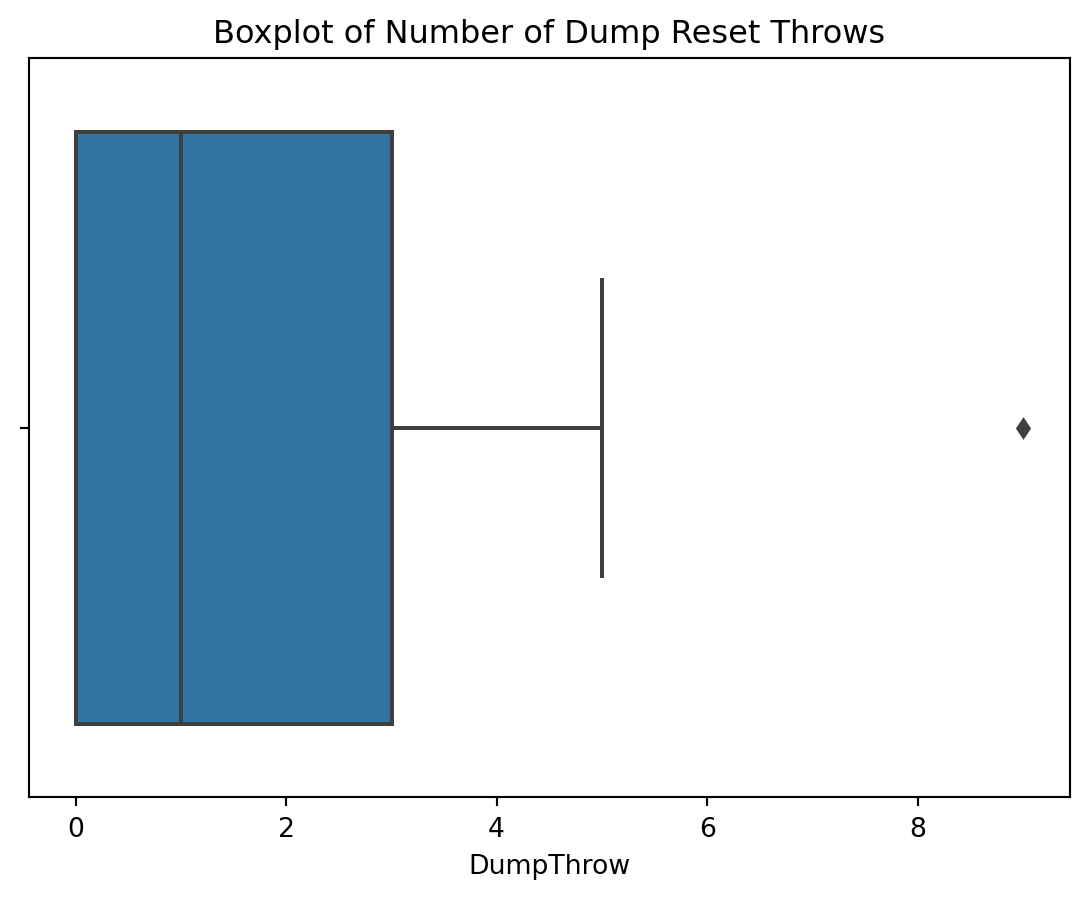

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=dat,x=dat["DumpThrow"])
plt.title("Boxplot of Number of Dump Reset Throws")
plt.show()

In [4]:
import numpy as np
import pandas as pd
dat = pd.read_csv("currDatSteelCity23.csv")
dat = dat.drop(['Unnamed: 0'], axis=1)
dat.head()

,Opponent,idx,DJI.ID,Full.ID,Game.ID,Point.ID,Possession.ID,Defense.Type,Handler,Receiver,...,BasicEPAOpp,TrueEPAHan,TrueEPARec,EPA,OppFactor2,EPAHan,EPARec,EPAHanRes,EPAHanTot,EPAHan2
0,Binghamton,538,472,1.1.1,1,1,1,Man,NaN,Micah,...,0.000,0.000,0.000,0.000,0.0,NaN,NaN,0.000,NaN,NaN
1,Binghamton,539,472,1.1.1,1,1,1,Man,Micah,John,...,0.024,0.018,0.005,0.053,0.0,0.039,0.014,0.015,0.054,0.059
2,Binghamton,540,472,1.1.1,1,1,1,Man,John,Dan B,...,0.011,0.008,0.002,0.042,0.0,0.031,0.011,0.000,0.031,0.046
3,Binghamton,541,472,1.1.1,1,1,1,Man,Dan B,Gribs,...,-0.249,-0.249,0.000,-0.420,0.0,-0.420,0.000,0.000,-0.420,-0.420
4,Binghamton,542,472,1.1.2,1,1,2,Man,NaN,Micah,...,0.000,0.000,0.000,0.000,0.0,NaN,0.000,0.000,NaN,NaN


In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

X = dat[['Opponent', 'Defense.Type', 'start.x', 'start.y', 'end.x', 'end.y', 'Force.Break', 'Throw.Type', 'Throw.Group']]
enc = LabelEncoder()
for col in ['Opponent', 'Defense.Type', 'start.x', 'start.y', 'end.x', 'end.y', 'Force.Break', 'Throw.Type', 'Throw.Group']:
    X[col] = X[col].astype('str')
    X[col] = enc.fit_transform(X[col])

y = dat['Action.Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = IsolationForest(random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_test)

pred = pd.DataFrame({'pred': y_pred})
pred['y_pred'] = np.where(pred['pred'] == -1, 1, 0)
y_pred = pred['y_pred'] 
print("Precision:", precision_score(y_test, y_pred))

Precision: 0.8503937007874016


C:\Users\k\AppData\Local\Temp\ipykernel_43248\3575705317.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('str')
C:\Users\k\AppData\Local\Temp\ipykernel_43248\3575705317.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = enc.fit_transform(X[col])
